# Mass Shootings in the United States, 1966-2016
----

### Hypotheses
* If mass shootings in the United States are higher in certain geographical areas and location types, then geography and location type plays a crucial part in the prevalence of mass shootings.
* If a firearm type, police department proximity, and number of firearms is tied to higher fatalities, then the total amount of victims can be dependent on these variables.


In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
from config import gkey
import gmaps
gmaps.configure(api_key=gkey)

In [2]:
#read in csv file
shootings_ep_df = pd.read_csv("Stanford_MSA_Shooting.csv",encoding="utf-8-sig")
shootings_ep_df.head()

,CaseID,Title,Location,City,State,Latitude,Longitude,Number of Civilian Fatalities,Number of Civilian Injured,Number of Enforcement Fatalities,...,Data Source 3,Data Source 4,Data Source 5,Data Source 6,Data Source 7,Military Experience,Class,Depreciation,Notes,Edit Date
0,1,University of Texas at Austin,"Austin, Texas",Austin,Texas,30.198887,-97.844159,15,32,1,...,http://news.google.com/newspapers?id=lkk0AAAAI...,http://news.google.com/newspapers?id=PPUjAAAAI...,http://books.google.com/books?id=ClYEAAAAMBAJ&...,NaN,NaN,Yes,SPK,1,NaN,6/8/2016
1,2,Rose-Mar College of Beauty,"Mesa, Arizona",Mesa,Arizona,33.422687,-111.816320,5,1,0,...,http://www.nydailynews.com/news/crime/beauty-s...,http://books.google.com/books?id=Cre7qsswRiwC&...,NaN,NaN,NaN,Unknown,MS,1,NaN,6/8/2016
2,3,New Orleans Police Shootings,"New Orleans, Louisiana",New Orleans,Louisiana,30.068724,-89.931474,4,8,5,...,http://www.trutv.com/library/crime/notorious_m...,http://books.google.com/books?id=TfEDmROcZwEC&...,NaN,NaN,NaN,Unknown,SPK,1,NaN,6/22/2016
3,4,Clara Barton Elementary School,"Chicago, Illinois",Chicago,Illinois,41.839280,-87.688181,1,3,0,...,http://www.leagle.com/xmlResult.aspx?page=1&xm...,NaN,NaN,NaN,NaN,Unknown,MS,1,NaN,6/21/2016
4,5,Olean High School,"Olean, New York",Olean,New York,42.081854,-78.432139,3,7,0,...,http://www.newswithviews.com/Erica/Carle10.htm,http://books.google.com/books?id=ZuKoSskEWyIC&...,"""Olean High School Shooting"". Larrie Benton Za...",NaN,NaN,Unknown,MS,1,NaN,6/21/2016


In [3]:

#filter out needed columns from original dataframe
shootings_ep_df = shootings_ep_df[["Title", "City", "State", "Latitude", "Longitude", "Number of Civilian Fatalities",
                    "Number of Civilian Injured", "Number of Enforcement Fatalities", 
                    "Number of Enforcement Injured","Total Number of Victims",
                    "Date", "Type of Gun - General",
                    "Total Number of Guns", "Relationship to Incident Location"]]

In [5]:
#EDDIE
#grab needed columns in DF
shootings_ep_df = shootings_ep_df[["Title", "City", "State", "Latitude", "Longitude", "Number of Civilian Fatalities",
  "Number of Civilian Injured", "Number of Enforcement Fatalities", 
  "Number of Enforcement Injured","Total Number of Victims","Date", "Type of Gun - General",
  "Total Number of Guns", "Relationship to Incident Location"]]

#check DF
shootings_ep_df.head()


,Title,City,State,Latitude,Longitude,Number of Civilian Fatalities,Number of Civilian Injured,Number of Enforcement Fatalities,Number of Enforcement Injured,Total Number of Victims,Date,Type of Gun - General,Total Number of Guns,Relationship to Incident Location
0,University of Texas at Austin,Austin,Texas,30.198887,-97.844159,15,32,1,0,48,8/1/1966,Multiple guns,7,Place of schooling
1,Rose-Mar College of Beauty,Mesa,Arizona,33.422687,-111.816320,5,1,0,0,6,11/12/1966,Handgun,1,None
2,New Orleans Police Shootings,New Orleans,Louisiana,30.068724,-89.931474,4,8,5,5,22,12/31/1972,Multiple guns,2,Local government
3,Clara Barton Elementary School,Chicago,Illinois,41.839280,-87.688181,1,3,0,0,4,1/17/1974,Handgun,2,Place of schooling
4,Olean High School,Olean,New York,42.081854,-78.432139,3,7,0,0,10,12/30/1974,Multiple guns,2,Place of schooling


In [6]:
#EDDIE
#data cleaning/ fill in empty cells
shootings_ep_df["Relationship to Incident Location"] = shootings_ep_df["Relationship to Incident Location"].replace(
    {"Place of Residency": "Place of residency", "Place of Recreation": "Place of recreation",
    "Place of Business/employment": "Place of business/employment", "Residential home/Neighborhood": "Place of residency" })

shootings_ep_df["Type of Gun - General"].nunique()

#shootings_ep_df["Type of Gun - General"] = shootings_ep_df["Type of Gun - General"].replace({"handgun": "Handgun", "Multiple Guns": "Multiple guns",
#                                                                                      "Multiple guns\r\n": "Multiple guns", "\r\nMultiple guns": "Multiple guns",
#                                                                                      "Semi-Automatic Rifle": "Rifle", "9-mm": "Handgun"})

shootings_ep_df["Type of Gun - General"] = shootings_ep_df["Type of Gun - General"].replace({"\r\nMultiple guns": "Multiple guns", "Multiple Guns": "Multiple guns", "Multiple guns\r\n":"Multiple guns",
                                                                                       "9-mm":"Handgun","handgun":"Handgun","Semi-Automatic Rifle":"Rifle"})


In [7]:
#EDDIE
#Group by gun type to get victim count
weapons_group = shootings_ep_df.groupby(["Type of Gun - General"])
weapons_group = weapons_group[["Total Number of Victims"]].sum()
weapons_group = weapons_group.reset_index(drop=False)
#check DF
weapons_group

,Type of Gun - General,Total Number of Victims
0,Handgun,1025
1,Multiple guns,926
2,Rifle,224
3,Shotgun,84
4,Unknown,357


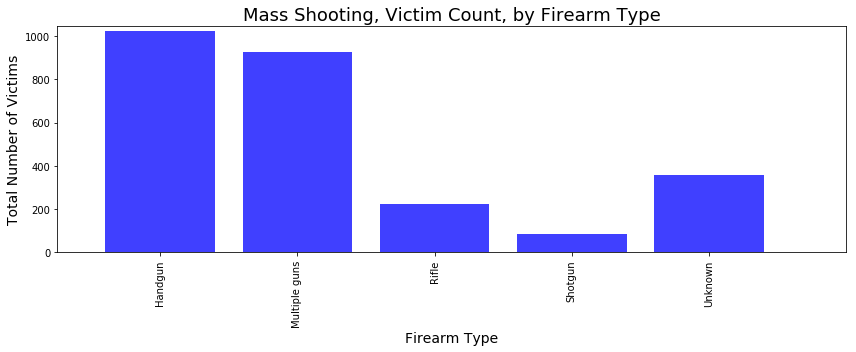

In [50]:
#EDDIE
#Build bar chart for mass shooting victim count
x_axis = np.arange(len(weapons_group))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(12,5))
plt.bar(x_axis, weapons_group["Total Number of Victims"], color="blue", alpha=0.75, align="center")
plt.xticks(tick_locations, weapons_group["Type of Gun - General"], rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(weapons_group["Total Number of Victims"])+ 20)
plt.title("Mass Shooting, Victim Count, by Firearm Type", fontsize=18)
plt.xlabel("Firearm Type", fontsize=14)
plt.ylabel("Total Number of Victims",fontsize=14)
plt.tight_layout()
plt.savefig("victim_cnt_by_firearm_bar_chart.png")
plt.show()

In [9]:
#EDDIE
#Create variables for pie chart (percent fatalities by firearm type)
total_fatality_cnt = weapons_group["Total Number of Victims"].sum()
total_fatality_cnt
pct_fatality_by_weapon = round(weapons_group["Total Number of Victims"] / total_fatality_cnt, 2)
pct_fatality_by_weapon

weapons_group["Percent Fatality"] = pct_fatality_by_weapon
weapons_group

,Type of Gun - General,Total Number of Victims,Percent Fatality
0,Handgun,1025,0.39
1,Multiple guns,926,0.35
2,Rifle,224,0.09
3,Shotgun,84,0.03
4,Unknown,357,0.14


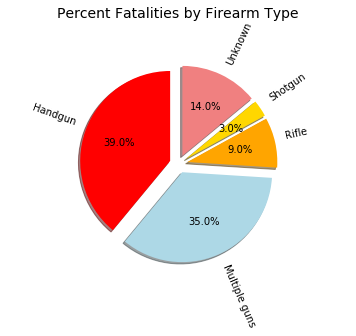

In [10]:
#EDDIE
#-------------------------------------------
# Build Pie Chart
#-------------------------------------------
# Labels for the sections of our pie chart
labels = [label for label in weapons_group["Type of Gun - General"] ]

# The values of each section of the pie chart
sizes = [size for size in weapons_group["Percent Fatality"]]

# The colors of each section of the pie chart
colors = ["red", "lightblue", "orange", "gold","lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90,rotatelabels=True)
plt.title("Percent Fatalities by Firearm Type",pad=38,fontsize=14)
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.savefig("pct_fatality_by_firearm_pie_chart.png")
plt.show()

----
# Jenny
----


In [11]:
shootings_ms_df = pd.read_csv("Stanford_MSA_Shooting.csv")
shootings_ms_df.head()

,CaseID,Title,Location,City,State,Latitude,Longitude,Number of Civilian Fatalities,Number of Civilian Injured,Number of Enforcement Fatalities,...,Data Source 3,Data Source 4,Data Source 5,Data Source 6,Data Source 7,Military Experience,Class,Depreciation,Notes,Edit Date
0,1,University of Texas at Austin,"Austin, Texas",Austin,Texas,30.198887,-97.844159,15,32,1,...,http://news.google.com/newspapers?id=lkk0AAAAI...,http://news.google.com/newspapers?id=PPUjAAAAI...,http://books.google.com/books?id=ClYEAAAAMBAJ&...,NaN,NaN,Yes,SPK,1,NaN,6/8/2016
1,2,Rose-Mar College of Beauty,"Mesa, Arizona",Mesa,Arizona,33.422687,-111.816320,5,1,0,...,http://www.nydailynews.com/news/crime/beauty-s...,http://books.google.com/books?id=Cre7qsswRiwC&...,NaN,NaN,NaN,Unknown,MS,1,NaN,6/8/2016
2,3,New Orleans Police Shootings,"New Orleans, Louisiana",New Orleans,Louisiana,30.068724,-89.931474,4,8,5,...,http://www.trutv.com/library/crime/notorious_m...,http://books.google.com/books?id=TfEDmROcZwEC&...,NaN,NaN,NaN,Unknown,SPK,1,NaN,6/22/2016
3,4,Clara Barton Elementary School,"Chicago, Illinois",Chicago,Illinois,41.839280,-87.688181,1,3,0,...,http://www.leagle.com/xmlResult.aspx?page=1&xm...,NaN,NaN,NaN,NaN,Unknown,MS,1,NaN,6/21/2016
4,5,Olean High School,"Olean, New York",Olean,New York,42.081854,-78.432139,3,7,0,...,http://www.newswithviews.com/Erica/Carle10.htm,http://books.google.com/books?id=ZuKoSskEWyIC&...,"""Olean High School Shooting"". Larrie Benton Za...",NaN,NaN,Unknown,MS,1,NaN,6/21/2016


In [12]:
#filter out needed columns from original dataframe
shootings_ms_df = shootings_ms_df[["Title", "City", "State", "Latitude", "Longitude", "Number of Civilian Fatalities",
                    "Number of Civilian Injured", "Number of Enforcement Fatalities", 
                    "Number of Enforcement Injured","Total Number of Victims",
                    "Date", "Type of Gun - General",
                    "Total Number of Guns", "Relationship to Incident Location"]]

In [13]:
#data cleaning/ fill in empty cells
shootings_ms_df["Relationship to Incident Location"] = shootings_ms_df["Relationship to Incident Location"].replace(
    {"Place of Residency": "Place of residency", "Place of Recreation": "Place of recreation",
    "Place of Business/employment": "Place of business/employment", "Residential home/Neighborhood": "Place of residency" })

shootings_ms_df["Type of Gun - General"] = shootings_ms_df["Type of Gun - General"].replace({"handgun": "Handgun", "Multiple Guns": "Multiple guns",
                                                                                      "Multiple guns\r\n": "Multiple guns", "\r\nMultiple guns": "Multiple guns",
                                                                                      "Semi-Automatic Rifle": "Rifle", "9-mm": "Handgun"})

shootings_ms_df["Relationship to Incident Location"] = shootings_ms_df["Relationship to Incident Location"].fillna("Unknown")


In [14]:
#combine the lat. and long. into one column
shootings_ms_df["Location"] = (shootings_ms_df["Latitude"]).astype(str)+','+ shootings_ms_df["Longitude"].astype(str)

#Create new column with total number of victim fatalitites
shootings_ms_df["Total Number of Victim Fatalities"] = shootings_ms_df["Number of Civilian Fatalities"] + shootings_ms_df["Number of Enforcement Fatalities"]

#Rearrange column order
shootings_ms_df = shootings_ms_df[["Title", "City", "State", "Location", "Number of Civilian Fatalities",
                    "Number of Civilian Injured", "Number of Enforcement Fatalities", 
                    "Number of Enforcement Injured", "Total Number of Victim Fatalities", "Total Number of Victims",
                    "Date", "Type of Gun - General",
                    "Total Number of Guns", "Relationship to Incident Location"]]
shootings_ms_df


,Title,City,State,Location,Number of Civilian Fatalities,Number of Civilian Injured,Number of Enforcement Fatalities,Number of Enforcement Injured,Total Number of Victim Fatalities,Total Number of Victims,Date,Type of Gun - General,Total Number of Guns,Relationship to Incident Location
0,University of Texas at Austin,Austin,Texas,"30.198887300000003,-97.84415949",15,32,1,0,16,48,8/1/1966,Multiple guns,7,Place of schooling
1,Rose-Mar College of Beauty,Mesa,Arizona,"33.42268696,-111.8163202",5,1,0,0,5,6,11/12/1966,Handgun,1,None
2,New Orleans Police Shootings,New Orleans,Louisiana,"30.0687242,-89.93147412",4,8,5,5,9,22,12/31/1972,Multiple guns,2,Local government
3,Clara Barton Elementary School,Chicago,Illinois,"41.83928045,-87.68818145",1,3,0,0,1,4,1/17/1974,Handgun,2,Place of schooling
4,Olean High School,Olean,New York,"42.08185369,-78.43213922",3,7,0,0,3,10,12/30/1974,Multiple guns,2,Place of schooling
5,Los Angeles Computer Learning Center,Los Angeles,California,"34.17622092,-118.53995420000001",1,6,1,0,2,8,2/19/1976,Shotgun,1,Place of schooling
6,Cal State Fullerton,Fullerton,California,"33.88404244,-117.92785",7,2,0,0,7,9,7/12/1976,Rifle,1,Place of business/employment
7,Grover Cleveland Elementary School,San Diego,California,"32.86357277,-117.1281628",2,8,0,1,2,11,1/29/1979,Rifle,1,Place of residency
8,University of South Carolina,Columbia,South Carolina,"34.05098834,-80.82077527",2,5,0,0,2,7,10/6/1979,Handgun,1,Place of schooling
9,Valley High School,Las Vegas,Nevada,"36.18931923,-115.3264875",1,2,0,0,1,3,3/19/1982,Handgun,1,Place of schooling


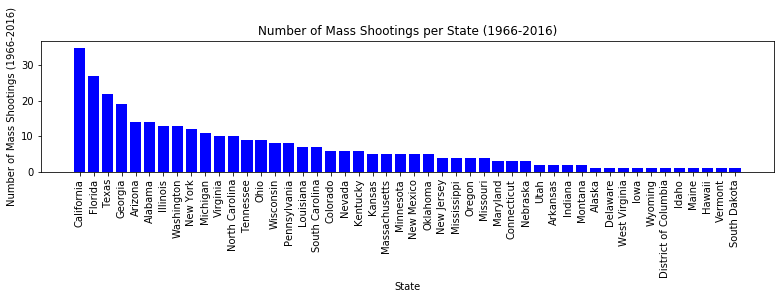

In [53]:
#count number of mass shooting per state
s = shootings_ms_df["State"].value_counts()
s_df = pd. DataFrame(s)

#reset index
s_df.reset_index(inplace=True)

#rename column header
s_df.rename(columns ={"index":"State","State":"Number of Mass Shootings"},inplace=True)

#plot bar graph to show number of mass shootings per state
x =s_df["State"]
y =s_df["Number of Mass Shootings"]

plt.figure(figsize=(11, 4))
plt.bar(x,y,color ="b",width=0.8, align="center")

#add x labels, y labels, title
plt.xlabel("State")
plt.ylabel("Number of Mass Shootings (1966-2016)")
plt.title("Number of Mass Shootings per State (1966-2016)")

#rotate x-axis to display name of states vertically
plt.xticks(rotation=90) 
plt.tight_layout()
#save image
plt.savefig("shootings_by_state_bar_chart.png")
#show fig
plt.show()

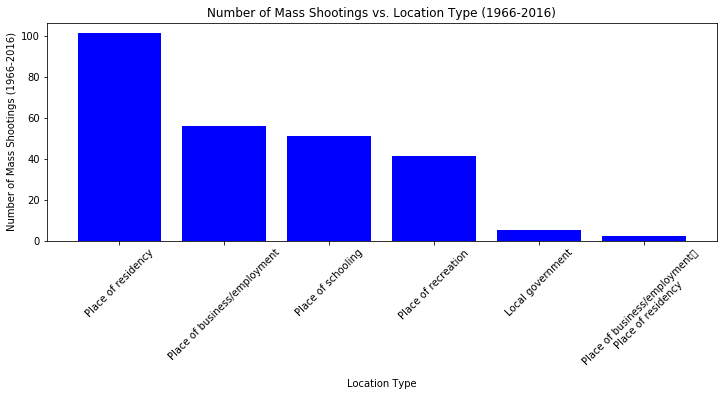

In [56]:
#count number of mass shooting at each location type
loc = shootings_ms_df["Relationship to Incident Location"].value_counts()
loc_df = pd. DataFrame(loc)

#drop unknown and none location type 
loc_df.drop(["Unknown","None"],inplace=True)

#reset index
loc_df.reset_index(inplace=True)

#rename column header
loc_df.rename(columns ={"index":"Location Type","Relationship to Incident Location":"Number of Mass Shootings"},inplace=True)
loc_df

#plot bar graph to show number of mass shootings occured at different location type
x =loc_df["Location Type"]
y =loc_df["Number of Mass Shootings"]

plt.figure(figsize=(12,4))
plt.bar(x,y,color ="b",width=0.8, align="center")

#add x labels, y labels, title
plt.xlabel("Location Type")
plt.ylabel("Number of Mass Shootings (1966-2016)")
plt.title("Number of Mass Shootings vs. Location Type (1966-2016)")

#rotate x-axis to display name of location type vertically
plt.xticks(rotation=45) 

#save image
plt.savefig("shooting_by_location_type_bar_chart.png")

#show fig
plt.show()

----
# Angie
----


In [17]:
shootings_ag_df = pd.read_csv("Stanford_MSA_Shooting.csv")
shootings_ag_df.head()

,CaseID,Title,Location,City,State,Latitude,Longitude,Number of Civilian Fatalities,Number of Civilian Injured,Number of Enforcement Fatalities,...,Data Source 3,Data Source 4,Data Source 5,Data Source 6,Data Source 7,Military Experience,Class,Depreciation,Notes,Edit Date
0,1,University of Texas at Austin,"Austin, Texas",Austin,Texas,30.198887,-97.844159,15,32,1,...,http://news.google.com/newspapers?id=lkk0AAAAI...,http://news.google.com/newspapers?id=PPUjAAAAI...,http://books.google.com/books?id=ClYEAAAAMBAJ&...,NaN,NaN,Yes,SPK,1,NaN,6/8/2016
1,2,Rose-Mar College of Beauty,"Mesa, Arizona",Mesa,Arizona,33.422687,-111.816320,5,1,0,...,http://www.nydailynews.com/news/crime/beauty-s...,http://books.google.com/books?id=Cre7qsswRiwC&...,NaN,NaN,NaN,Unknown,MS,1,NaN,6/8/2016
2,3,New Orleans Police Shootings,"New Orleans, Louisiana",New Orleans,Louisiana,30.068724,-89.931474,4,8,5,...,http://www.trutv.com/library/crime/notorious_m...,http://books.google.com/books?id=TfEDmROcZwEC&...,NaN,NaN,NaN,Unknown,SPK,1,NaN,6/22/2016
3,4,Clara Barton Elementary School,"Chicago, Illinois",Chicago,Illinois,41.839280,-87.688181,1,3,0,...,http://www.leagle.com/xmlResult.aspx?page=1&xm...,NaN,NaN,NaN,NaN,Unknown,MS,1,NaN,6/21/2016
4,5,Olean High School,"Olean, New York",Olean,New York,42.081854,-78.432139,3,7,0,...,http://www.newswithviews.com/Erica/Carle10.htm,http://books.google.com/books?id=ZuKoSskEWyIC&...,"""Olean High School Shooting"". Larrie Benton Za...",NaN,NaN,Unknown,MS,1,NaN,6/21/2016


In [18]:
#ANGIE
#Filter out needed columns from original dataframe
shootings_ag_df = shootings_ag_df[["Title", "City", "State", "Latitude", "Longitude", "Number of Civilian Fatalities",
                    "Number of Civilian Injured", "Number of Enforcement Fatalities", 
                    "Number of Enforcement Injured","Total Number of Victims",
                    "Date", "Type of Gun - General",
                    "Total Number of Guns", "Relationship to Incident Location"]]

In [19]:
#ANGIE
#Obtain coordinates from the latitude and longitude columns
loc = []
for index, row in shootings_ag_df.iterrows():
    coordinates = (row["Latitude"],row["Longitude"]) 
    loc.append(coordinates)

In [20]:
#ANGIE
#Format map
figure_layout = {
    'width': '800px',
    'height': '500px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [21]:
#ANGIE
#Assign the marker layer to a variable
markers = gmaps.marker_layer(loc)
#Add the layer to the map
fig.add_layer(markers)
fig

#if map does not display go to command prompt and issue the command below:
#  jupyter nbextension enable --py gmaps


Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

In [23]:
#ANGIE
#Data cleaning
shootings_ag_df["Relationship to Incident Location"] = shootings_ag_df["Relationship to Incident Location"].replace(
    {"Place of Residency": "Place of residency", "Place of Recreation": "Place of recreation",
    "Place of Business/employment": "Place of business/employment", "Residential home/Neighborhood": "Place of residency" })

shootings_ag_df["Type of Gun - General"] = shootings_ag_df["Type of Gun - General"].replace({"handgun": "Handgun", "Multiple Guns": "Multiple guns",
                                                                                      "Multiple guns\r\n": "Multiple guns", "\r\nMultiple guns": "Multiple guns",
                                                                                      "Semi-Automatic Rifle": "Rifle", "9-mm": "Handgun"})

#Fill empty rows with unknown
shootings_ag_df["Relationship to Incident Location"] = shootings_ag_df["Relationship to Incident Location"].fillna("Unknown")


In [24]:
#ANGIE
#Combine the lat. and long. into one column
shootings_ag_df["Location"] = (shootings_ag_df["Latitude"]).astype(str)+','+ shootings_ag_df["Longitude"].astype(str)

#Create new column with total number of victim fatalitites
shootings_ag_df["Total Number of Victim Fatalities"] = shootings_ag_df["Number of Civilian Fatalities"] + shootings_ag_df["Number of Enforcement Fatalities"]

#Rearrange column order
shootings_ag_df = shootings_ag_df[["Title", "City", "State", "Location", "Number of Civilian Fatalities",
                    "Number of Civilian Injured", "Number of Enforcement Fatalities", 
                    "Number of Enforcement Injured", "Total Number of Victim Fatalities", "Total Number of Victims",
                    "Date", "Type of Gun - General",
                    "Total Number of Guns", "Relationship to Incident Location"]]
shootings_ag_df


,Title,City,State,Location,Number of Civilian Fatalities,Number of Civilian Injured,Number of Enforcement Fatalities,Number of Enforcement Injured,Total Number of Victim Fatalities,Total Number of Victims,Date,Type of Gun - General,Total Number of Guns,Relationship to Incident Location
0,University of Texas at Austin,Austin,Texas,"30.198887300000003,-97.84415949",15,32,1,0,16,48,8/1/1966,Multiple guns,7,Place of schooling
1,Rose-Mar College of Beauty,Mesa,Arizona,"33.42268696,-111.8163202",5,1,0,0,5,6,11/12/1966,Handgun,1,None
2,New Orleans Police Shootings,New Orleans,Louisiana,"30.0687242,-89.93147412",4,8,5,5,9,22,12/31/1972,Multiple guns,2,Local government
3,Clara Barton Elementary School,Chicago,Illinois,"41.83928045,-87.68818145",1,3,0,0,1,4,1/17/1974,Handgun,2,Place of schooling
4,Olean High School,Olean,New York,"42.08185369,-78.43213922",3,7,0,0,3,10,12/30/1974,Multiple guns,2,Place of schooling
5,Los Angeles Computer Learning Center,Los Angeles,California,"34.17622092,-118.53995420000001",1,6,1,0,2,8,2/19/1976,Shotgun,1,Place of schooling
6,Cal State Fullerton,Fullerton,California,"33.88404244,-117.92785",7,2,0,0,7,9,7/12/1976,Rifle,1,Place of business/employment
7,Grover Cleveland Elementary School,San Diego,California,"32.86357277,-117.1281628",2,8,0,1,2,11,1/29/1979,Rifle,1,Place of residency
8,University of South Carolina,Columbia,South Carolina,"34.05098834,-80.82077527",2,5,0,0,2,7,10/6/1979,Handgun,1,Place of schooling
9,Valley High School,Las Vegas,Nevada,"36.18931923,-115.3264875",1,2,0,0,1,3,3/19/1982,Handgun,1,Place of schooling


In [25]:
#ANGIE
#Create 2 new columns
shootings_ag_df["Nearest Police Department"] = ""
shootings_ag_df["Nearest Police Department Proximity"] = ""

#Parameters for google api nearby search 
params = {"location": "",
          "rankby": "distance", 
          "type": "police",
          "keyword": "department",
          "name": "police department",
          "key": gkey,}

#Loop through rows in the dataframe
for index, row in shootings_ag_df.iterrows():
    
    location = row["Location"]
    
    params["location"] = location
    
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    response = requests.get(base_url, params=params).json()
    
    #Add name of the nearest police department to column
    shootings_ag_df.loc[index, "Nearest Police Department"] = response["results"][0]["name"]
    
    #Obtain latitude of nearest police department
    pd_lat = response["results"][0]["geometry"]["location"]["lat"]
    
    #Obtain longitude of nearest police department
    pd_lon = response["results"][0]["geometry"]["location"]["lng"]
    
    #Combine the latitude and longitude into a string
    pd_location = f"{pd_lat},{pd_lon}"
    
    #Find distance from shooting site to the nearest police department
    dist_url = ('https://maps.googleapis.com/maps/api/distancematrix/json?units=imperial&origins={0}&destinations={1}&key={2}').format(location, pd_location, gkey)
    
    data = requests.get(dist_url).json()
    
    proximity = str(data["rows"][0]["elements"][0]["distance"]["text"])
    
    #If the unit is in ft...
    #Drop the last 3 characters
    #Convert units to miles
    #Add proximity to column 
    if " ft" in proximity:        
        proximity = proximity[:-3]
        proximity = float(proximity) / 5280
        shootings_ag_df.loc[index, "Nearest Police Department Proximity"] = str(proximity)
      
    #Else add the proximity to column
    else:
        shootings_ag_df.loc[index, "Nearest Police Department Proximity"] = proximity

#Preview updated data frame
shootings_ag_df.head()

,Title,City,State,Location,Number of Civilian Fatalities,Number of Civilian Injured,Number of Enforcement Fatalities,Number of Enforcement Injured,Total Number of Victim Fatalities,Total Number of Victims,Date,Type of Gun - General,Total Number of Guns,Relationship to Incident Location,Nearest Police Department,Nearest Police Department Proximity
0,University of Texas at Austin,Austin,Texas,"30.198887300000003,-97.84415949",15,32,1,0,16,48,8/1/1966,Multiple guns,7,Place of schooling,Sunset Valley Police,3.5 mi
1,Rose-Mar College of Beauty,Mesa,Arizona,"33.42268696,-111.8163202",5,1,0,0,5,6,11/12/1966,Handgun,1,None,Mesa Police Department,1.5 mi
2,New Orleans Police Shootings,New Orleans,Louisiana,"30.0687242,-89.93147412",4,8,5,5,9,22,12/31/1972,Multiple guns,2,Local government,New Orleans Police Department,7.4 mi
3,Clara Barton Elementary School,Chicago,Illinois,"41.83928045,-87.68818145",1,3,0,0,1,4,1/17/1974,Handgun,2,Place of schooling,Cook County Sheriff-Criminal,1.0 mi
4,Olean High School,Olean,New York,"42.08185369,-78.43213922",3,7,0,0,3,10,12/30/1974,Multiple guns,2,Place of schooling,Olean Police Department,0.5 mi


In [26]:
#ANGIE
#Drop the last 3 characters in the column
shootings_ag_df['Nearest Police Department Proximity'] = shootings_ag_df['Nearest Police Department Proximity'].apply(lambda x: x.replace(" mi", ""))

#Convert values in column to floats
shootings_ag_df["Nearest Police Department Proximity"] = pd.to_numeric(shootings_ag_df["Nearest Police Department Proximity"])

#Round two decimal places
decimals = 2
shootings_ag_df["Nearest Police Department Proximity"] = shootings_ag_df["Nearest Police Department Proximity"].apply(lambda x: round(x, decimals))


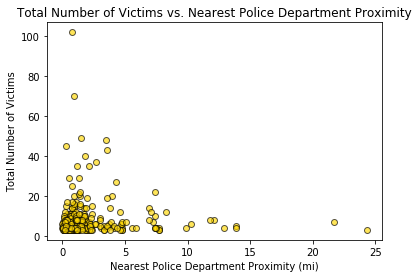

In [27]:
#ANGIE
#Create scatter plot
#Correlation between nearest police department proximity and total number of victims
plt.scatter(shootings_ag_df["Nearest Police Department Proximity"], shootings_ag_df["Total Number of Victims"], marker="o", facecolors="gold", edgecolors="black", alpha=0.65)
plt.ylabel("Total Number of Victims")
plt.xlabel("Nearest Police Department Proximity (mi)")
plt.title("Total Number of Victims vs. Nearest Police Department Proximity")
plt.savefig("law_enforcement_proximity_scatter_plot.png")
plt.show()

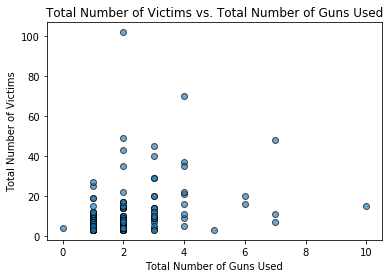

In [28]:
#ANGIE
new_df = shootings_ag_df

#Rename the column to remove spaces
new_df = new_df.rename(columns={"Total Number of Guns": "tot_num_guns"})

#Drop all rows that contain the unknown value
new_df = new_df[~new_df.tot_num_guns.str.contains("Unknown")]

#Convert all values in column to floats
new_df["tot_num_guns"] = pd.to_numeric(new_df["tot_num_guns"])

#Plot correlation between total number of guns and total number of victims
plt.scatter(new_df["tot_num_guns"], new_df["Total Number of Victims"], edgecolors="black", alpha=0.65)
plt.ylabel("Total Number of Victims")
plt.xlabel("Total Number of Guns Used")
plt.title("Total Number of Victims vs. Total Number of Guns Used") 
plt.savefig("total_guns_vs_total_vics_scatter_plot.png")
plt.show()